<a href="https://colab.research.google.com/github/CS222-UIUC/course-project-group-102/blob/main/Training_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
url = 'https://raw.githubusercontent.com/CS222-UIUC/course-project-group-102/main/Training_Dataset.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,DATE,AVERAGE STOCK PRICE,AVERAGE HOUSE PRICE
0,1/1/2000,"1,372.31",112533.0188
1,2/1/2000,"1,384.70",112998.5579
2,3/1/2000,"1,449.81",113355.1248
3,4/1/2000,"1,433.26",113456.4132
4,5/1/2000,"1,421.32",113958.5905


In [ ]:
#made a dataframe out of data variable
df = pd.DataFrame(data)
#conversion of all numeric values to float
df['AVERAGE STOCK PRICE'] = df['AVERAGE STOCK PRICE'].str.replace(',', '')
df['AVERAGE STOCK PRICE'] = df['AVERAGE STOCK PRICE'].astype('float')
df = df.rename(columns={'AVERAGE STOCK PRICE':'Average_Stock_Price'})
df = df.rename(columns={'AVERAGE HOUSE PRICE':'Average_House_Price'})
print (df)
print (df.dtypes)


         DATE  Average_Stock_Price  Average_House_Price
0    1/1/2000              1372.31          112533.0188
1    2/1/2000              1384.70          112998.5579
2    3/1/2000              1449.81          113355.1248
3    4/1/2000              1433.26          113456.4132
4    5/1/2000              1421.32          113958.5905
..        ...                  ...                  ...
267  4/1/2022              4358.87          263235.3499
268  5/1/2022              4058.99          265565.4204
269  6/1/2022              3907.19          269000.8939
270  7/1/2022              3930.86          269400.9397
271  8/1/2022              4139.91          269159.5280

[272 rows x 3 columns]
DATE                    object
Average_Stock_Price    float64
Average_House_Price    float64
dtype: object


In [ ]:
X = np.array(df.Average_Stock_Price)
y = np.array(df.Average_House_Price)

In [ ]:
#print(X)
#print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [ ]:
#print(X_train)  
#print(y_train)

In [ ]:
#lda = LinearDiscriminantAnalysis(n_components=2)
#lda.fit(X_train, y_train)

In [ ]:
reg = LinearRegression().fit(np.array(X_train).reshape(-1,1), y_train)


In [ ]:
print(reg.score(X.reshape(-1,1),y))

0.7837555190406205


In [ ]:
#predictions drawn from testing data
#compare to y_test?
#see plot below for initial prediction plot
preds = reg.predict(np.array(X_test).reshape(-1,1))
preds

array([176315.2683038 , 167177.59808726, 170090.28655105, 141688.73252774,
       140314.34317765, 144282.57462652, 176373.29475297, 149191.49258377,
       138823.00361302, 150727.0997488 , 141593.61700797, 179081.69422305,
       138909.14597054, 139483.72745944, 144610.69325918, 158915.11029473,
       131827.82543448, 227084.52295342, 164150.35225218, 198382.66710041,
       146166.34048655, 135857.373492  , 166647.28419875, 139827.10046791,
       146556.07483326, 148615.71467324, 141471.88110689, 163895.5144445 ,
       149789.4042945 , 149588.70456569, 166403.51329117, 141437.48398496,
       149933.8722066 , 162265.98818134, 161186.51676361, 140725.91221916,
       133271.90634464, 142643.17788489, 156850.38566282, 199138.80557201,
       147249.99937999, 130875.17470977, 138872.95421616, 147217.99510132,
       184511.65380115, 130668.19376739, 137974.74067573, 168105.7221685 ,
       135690.77177971, 146248.29536836, 137643.03277818, 183672.66313152,
       155976.69876584, 1

In [ ]:
y_test

array([169010.8145, 163349.2936, 164586.5192, 156697.3775, 156506.6114,
       137555.5185, 169887.0888, 114354.1988, 143978.5472, 168643.0938,
       162007.4398, 172928.4575, 143743.6856, 143648.3842, 135976.7971,
       145598.7233, 153770.6003, 265565.4204, 149893.2503, 197030.3294,
       135674.692 , 145810.9169, 151299.4775, 144334.6832, 118565.3275,
       136850.9258, 155391.6182, 157614.3068, 117137.9128, 139178.9582,
       152715.2625, 157502.1659, 166195.1025, 148993.4031, 148506.124 ,
       135772.7614, 147419.6527, 162642.8771, 145137.4906, 195389.4032,
       135242.857 , 135315.9096, 150604.2507, 137724.5405, 180438.375 ,
       134744.9319, 143421.113 , 154685.3092, 155094.9084, 162570.2266,
       125690.9805, 175505.379 , 144811.8598, 194515.2356, 117791.0391])

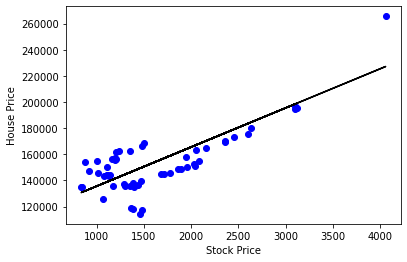

In [ ]:
#initial test data plot (need to add more here with the testing dataset we have on gitHub)
y_pred = reg.predict(X_test.reshape(-1, 1))
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.xlabel("Stock Price")
plt.ylabel("House Price")

plt.show()

In [ ]:
#accuracy metrics
residuals = preds - y_test
residuals

array([  7304.4538038 ,   3828.30448726,   5503.76735105, -15008.64497226,
       -16192.26822235,   6727.05612652,   6486.20595297,  34837.29378377,
        -5155.54358698, -17915.9940512 , -20413.82279203,   6153.23672305,
        -4834.53962946,  -4164.65674056,   8633.89615918,  13316.38699473,
       -21942.77486552, -38480.89744658,  14257.10195218,   1352.33770041,
        10491.64848655,  -9953.543408  ,  15347.80669875,  -4507.58273209,
        27990.74733326,  11764.78887324, -13919.73709311,   6281.2076445 ,
        32651.4914945 ,  10409.74636569,  13688.25079117, -16064.68191504,
       -16261.2302934 ,  13272.58508134,  12680.39276361,   4953.15081916,
       -14147.74635536, -19999.69921511,  11712.89506282,   3749.40237201,
        12007.14237999,  -4440.73489023, -11731.29648384,   9493.45460132,
         4073.27880115,  -4076.73813261,  -5446.37232427,  13420.4129685 ,
       -19404.13662029, -16321.93123164,  11952.05227818,   8167.28413152,
        11164.83896584,  

(array([ 1.,  0.,  5.,  9.,  7.,  7., 16.,  6.,  0.,  4.]),
 array([-38480.89744658, -31149.07832354, -23817.25920051, -16485.44007747,
         -9153.62095444,  -1821.8018314 ,   5510.01729163,  12841.83641467,
         20173.6555377 ,  27505.47466074,  34837.29378377]),
 <a list of 10 Patch objects>)

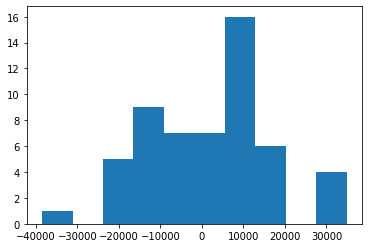

In [ ]:
plt.hist(residuals)

In [ ]:
mean_squared_error(y_test, preds) ** 0.5

14920.794721686125